# Introduction to Object-Oriented Programming

In [295]:
# Best practice: import everything at the top
import numpy as np
import matplotlib.pyplot as plt

## Goals for this lesson
1. Understand some of the advantages of object-oriented programming
2. Learn how to use classes to encapsulate data and functions in Python
3. Implement a class to solve a 1D diffusion problem

# Why should you use classes? or, POP vs. OOP

# The world of POP

Up until now, we have mostly stayed in the world of "procedure-oriented programming" (POP). You write a series of instructions for the computer - "procedures" - probably start to organize them into functions, and then call those functions on a bunch of data. This works great when you have a simple problem where you can organize your code like this:

In [372]:
# Step 1) deal with our data
baseline_temperature = -10.0
temperature_amplitude = 25.0
time_steps = np.arange(3650)
air_temperature = baseline_temperature + temperature_amplitude * np.sin(2 * np.pi / 365 * time_steps)

# Step 2) make some functions
def calc_derivative(temperature):
    # does something cool
    pass

def calc_flux(derivative):
    # does something also very cool
    pass

def calc_divergence(flux):
    # maybe we're not entirely sure why this works, but it does
    pass

def plot_results(temperature):
    # hopefully our array has the right shape, otherwise this might break
    pass

# Step 3) run the actual model
for t in time_steps:
    dT = calc_derivative(air_temperature)
    flux = calc_flux(dT)
    divergence = calc_divergence(flux)
    plot_results(divergence)

This is all very well and good, and actually quite easy to read and understand when it's a small example like this one. But what would happen if we wanted to run a few models with new sets of parameters? We might end up, for example, with a bunch of arrays with names like <tt>surface_temperature_plus_2_degrees</tt>, <tt>surface_temperature_plus_8_degrees_daily_dt</tt>, <tt>surface_temperature_plus_8_degrees_monthly_dt</tt>, and so on. Then, we might need to change one or two things in our functions for each scenario, so we'll make a few new ones with names like <tt>calc_flux_with_geotherm</tt> or <tt>plot_results_year_by_year</tt>. Pretty soon, we're not going to be able to hold all this information in our head, and that's when we'll start to introduce hidden bugs. What happens if we run these functions multiple times for different climate scenarios, but each time we're accidentally modifying the same set of arrays? What happens if we have a bunch of functions that have really similar logic, and we decide to change one line? How many times will we have to make that same change? What would we do if we wanted to run a sensitivity analysis with hundreds of combinations of parameters?

# The world of OOP

A different way we can organize our code is called "object-oriented programming" (OOP). The core idea in OOP is to link our *data* with the *functions* that operate on those data. In Python, we'll do this with **classes**. Note that this isn't the only approach - you can totally solve all the problems I mentioned above with clever implementations of functions. But, there are a few really nice benefits to OOP in the context of scientific modeling:
* We have to organize our code into logical chunks
* That means we can build big programs by dividing them into small pieces
* It's really easy for users (that includes you!) to figure out which functions get to modify a chunk of data
* It's easier to return to code that you wrote a long time ago and understand what's happening
* We won't have to copy+paste or repeat code very often (if at all)

# Intro to classes

Using a class consists of two steps: first we make a blueprint that defines the object, then we make an instance of the object to use it. If you think about it, we actually do the same thing with functions. Here's an example:

In [318]:
# "def" means we are defining a function
def my_function(arg_1, arg_2): # the function gets a name, "my_function"
    # and it takes two arguments, "arg_1" and "arg_2"
    result = arg_1 * arg_2 # we can make new variables inside the function
    
    return result # and at the end we should return something

Wait, we just ran the code and it didn't do anything! That's because all we've done here is define the function. To use it, we would have to do something like:

In [319]:
# use the function
answer = my_function(100, 2)
print(answer)

200


Let's keep this in mind as we look at classes. First, instead of using "def" we'll define a class by calling it ... a class!

##### ***Classes are objects that hold data and the functions that will operate on the data.***

In [311]:
class MyModel:

SyntaxError: incomplete input (546207509.py, line 1)

This raises an error - similar to the error you would get if you tried to make a function that didn't do anything. Let's keep going. The first thing we need to do is tell Python how to deal with a brand-new instance of this object. We'll do that by defining a "method." 

##### ***Methods are functions that belong to a particular class.***

In [326]:
class MyModel:

    def __init__(self, a):
        self.a = a

Let's take a sec and look carefully at what's going on here. First, we have a weird function that's idented a level. This is a method, and we'll treat it exactly like a function, with two exceptions:
1. Indent methods (along with everything else in a class) one level inside the class definition.
2. The first argument to a method should be "self."

Note that unlike a lot of things in Python, you can't name "self" whatever you want. In this case, it's a reserved keyword that will **always** refer to an instance of the object.

Also, what's with the weird double-underscores on either side of <tt>init</tt>? and why call it <tt>init</tt> instead of something like <tt>initialize</tt>? This is another reserved phrase in Python. Functions that we define ourselves, like <tt>my_function</tt>, we can name whatever we want. But some functions in Python are built-in - that is, they are given reserved names, and Python will call them using those reserved names in certain situations.

For example, <tt>\_\_init\_\_</tt> gets called when we make a new instance of the class:

In [327]:
model = MyModel(100)

Notice that we don't need to specify self. It is implicitly filled in, so we just need to include the arguments after it (in this case, *a*). This will be true every time we call a method. 

Now, all of the code we added to the init method was called when we made an instance of MyModel. (Try it out! Add a print statement inside the init method.) In this case, we told Python that *self* - the instance of the model we just made - should have an *attribute* that is equal to the argument a.

##### ***Attributes are pieces of data that belong to an instance of a class.***

We can access attributes using the same "dot" syntax that we used to make them:

In [328]:
model.a

100

To make a new method, we'll just keep adding text to the class definition. We still need to specify *self* as the first argument to the method. We can use class attributes inside methods - in fact, that's one great reason to use classes! And, we can either have them return results, or store those results as new attributes.

In [332]:
class MyModel:

    def __init__(self, a):
        self.a = a

    def add(self, b):
        self.b = self.a + b

    def add_and_return(self, b):
        return self.a + b

In [334]:
model = MyModel(2)
model.add(2)
print(model.b)

4


In [335]:
print(model.add_and_return(2))

4


**Important note:** attributes can be anything you want: strings, numbers, dictionaries, arrays - even other classes!

# Let's build a class!

I often find that I don't know what questions I have until I'm actually working with something. So, here's an example problem. It's a much simpler version of something that I'm actually using for research, and I chose to use a class to help me organize it. (More specifically, I made a couple different classes that all work together.)

### Motivation: What sets the temperature profile through an ice sheet?

We think about half of Greenland's contribution to sea level rise comes from ice discharge. The rate at which ice flows depends on its temperature in two pretty important ways: (1) warmer ice tends to be softer, and thus deforms faster, and (2) warm temperatures at the bed allow ice to slide more rapidly. On longer time scales, this also means that warm-bedded glaciers are much more efficient agents of erosion and sediment transport. We can usually measure the temperature at the surface of the ice sheet, but it's rare that we get to measure the temperature inside the ice. So, it's great opportunity to put together a simple numerical model to give us a prediction to work off of.

Skipping over the full derivation, the temperature (we'll call it $T$) in one dimension can be modeled as:

# $\rho c\left(\frac{dT}{dt} + w\frac{dT}{dz}\right) = k\frac{dT^2}{dz^2} + P.$

The first term here is the time evolution of temperature, where $\rho$ is the ice density and $c$ is the specific heat. Then, we have vertical advection, which advects cold ice downwards at some vertical velocity $w$. And then on the right-hand side, we have diffusion, modified by thermal conductivity $k$, and any sources or sinks of heat within the ice $P$.

In the simplest possible case, we could ignore vertical advection and any sources or sinks of heat, which would reduce to Fourier's law:

# $\frac{dT}{dt} = \kappa\frac{dT^2}{dz^2},$

where we have also wrapped up $k / (\rho c)$ into a thermal diffusivity, $\kappa$. We'll need some boundary conditions, so let's say that the temperature at the surface is equal to -10.0 C, and that the gradient of the temperature, $\frac{dT}{dz} = 0$ at the bed. We could also consider adding a heat flux from the bed, perhaps from geothermal heating, but that will be a later exercise.

Let's start putting this together in a class. You'll see that this will actually help us organize some of the ideas as we go along.

In [379]:
class SimpleGlacier:
    """Models the temperature profile with a glacier.
    
    This model is based off of: 
    The Physics of Glaciers (Cuffey and Paterson, 2010).
    Lecture notes from Andy Aschwanden (McCarthy school, summer 2012).

    Attributes:
        z: an array of z-coordinates
    """

    def __init__(self, z: np.ndarray, ice_density: float = 917.0):
        """Initialize the model with an array of z-coordinates."""
        self.z = z
        self.ice_density = ice_density

    def run_one_step(self, dt: float) -> np.ndarray:
        """Advance the model by one step of size dt."""
        pass

Note that we've added a little bit of extra documentation. One piece of documentation is called type-hinting. By adding a colon after arguments in the function signature, or an arrow after the definition of a function, we can give the user hints as to the input/output types. It's super extra and unnecessary, but I (and many others in CSDMS) like to use it to help us visually see what's going on. You can also use external programs to enforce these types more strictly, but Python will ignore them by default.

More importantly, whenever you see writing inside triple-quotes, it's called a *doc-string*. Basically, it's a string of text that can be automatically read by many different programs, to help people use your model. Try it out:

In [363]:
help(SimpleGlacier)

Help on class SimpleGlacier in module __main__:

class SimpleGlacier(builtins.object)
 |  SimpleGlacier(z: numpy.ndarray, ice_density: float = 917.0)
 |  
 |  Models the temperature profile with a glacier.
 |  
 |  This model is based off of: 
 |  The Physics of Glaciers (Cuffey and Paterson, 2010).
 |  Lecture notes from Andy Aschwanden (McCarthy school, summer 2012).
 |  
 |  Attributes:
 |      z: an array of z-coordinates
 |  
 |  Methods defined here:
 |  
 |  __init__(self, z: numpy.ndarray, ice_density: float = 917.0)
 |      Initialize the model with an array of z-coordinates.
 |  
 |  run_one_step(self, dt: float) -> numpy.ndarray
 |      Advance the model by one step of size dt.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables
 |  
 |  __weakref__
 |      list of weak references to the object



In [364]:
help(SimpleGlacier.run_one_step)

Help on function run_one_step in module __main__:

run_one_step(self, dt: float) -> numpy.ndarray
    Advance the model by one step of size dt.



We also added an attribute with a default value. We could override this:

In [369]:
model = SimpleGlacier(np.arange(10), 10000000000)
print(model.ice_density)

10000000000


But if we don't, we'll get the default value:

In [370]:
model = SimpleGlacier(np.arange(10))
print(model.ice_density)

917.0


At this point, you have all the tools you need to extend this class. First, let's add some more parameters: we'll want the thermal conductivity (often 2.1 W m$^{-1}$ K$^{-1}$), the ice density (often 917 kg m$^{-3}$), and the specific heat capacity of ice (2,093 J K$^{-1}$ kg$^{-1}$). Let's also make a decision here: since we don't think anyone will really want to change these values, **don't include them as arguments to \_\_init\_\_.** Instead, add them as attributes automatically when the class is instantiated.

### Question: if you wanted to, could you still change these parameter values for a particular instance of the class?
(Try it!)

### Next, write a method to calculate the thermal diffusivity. 
(It's up to you if you want to store that value as an attribute or return it directly.)

Now, let's write the rest of the model. This will be mostly self-directed.

![rest-of-the-owl](./media/draw-the-owl.jpg)

Just kidding - here's a template, but feel free to draw your own owl :)

In [541]:
class SimpleGlacier:
    """Models the temperature profile with a glacier.
    
    This model is based off of: 
    The Physics of Glaciers (Cuffey and Paterson, 2010).
    Lecture notes from Andy Aschwanden (McCarthy school, summer 2012).

    Attributes:
        z: an array of z-coordinates
        temperature: an array representing the temperature profile with depth
    """

    def __init__(self, z: np.ndarray, initial_temperature: np.ndarray):
        """Initialize the model with arrays of z-coordinates and initial temperature profile."""
        self.z = z
        self.temperature = initial_temperature

        # We probably want to calculate dz --> try using np.gradient

        # We'll need attributes for rho, c, and k
        # You could also store info about boundary conditions at this point, if you want
    
        # Maybe we should go ahead and calculate diffusivity right away?
    
        # Let's keep track of the elapsed time

    def calc_diffusivity(self):
        """From above, kappa = k / (rho * c)."""
        pass

    def calc_heat_flux(self):
        """The heat flux is -kappa * dT / dz."""
        
        # How should we calculate the difference in temperature with depth? (hint: see dz, above)

        # Are dT and dz the same size? Are they the same size as z?

        # Don't forget to apply boundary conditions! The heat flux at the bed should be zero, for now.
        
        pass

    def calc_divergence(self):
        """In 1D, divergence is just the derivative. yay!"""
        pass
    
    def run_one_step(self, dt: float) -> np.ndarray:
        """Advance the model by one step of size dt."""

        # updated temperature = current temperature + the divergence * dt

        # Don't forget to apply boundary conditions! The temperature at the surface is equal to a fixed value.

        pass

### Test case: 

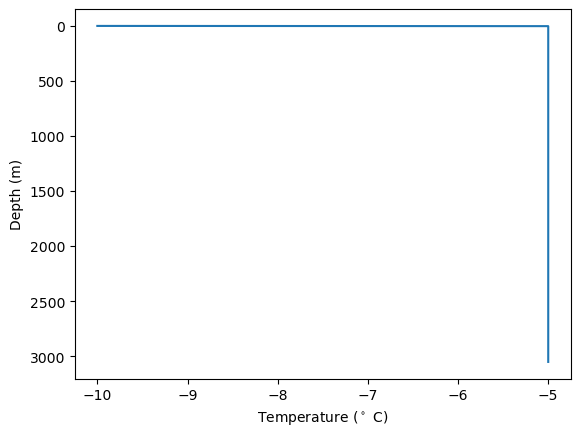

In [539]:
# The Greenland ice sheet is 3,053 m thick at the summit!
z = np.arange(3053)

# Let's set the temperature to 0.0 C everywhere, except the surface
T0 = np.full_like(z, -5.0)
T0[0] = -10.0

# Tip: maybe you wnat to include this plotting function into your class?
plt.plot(T0, z)
plt.xlabel('Temperature ($^\circ$ C)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis() # This forces matplotlib to invert the y-axis
plt.show()

Now, let's test out your model. I want to run it using the exact code below. As you do, think about the following questions:
1) Does it pass? Try to move things around until the code runs without any errors.
2) Plot the output. Does it match what you might expect?
3) What should the steady-state profile look like? What parameters can we change to converge faster/slower?

In [528]:
model = SimpleGlacier(z, T0)

dt = 60 * 60 * 24

for i in range(365): 
    model.run_one_step(dt)
    print(f'{model.time_elapsed / 31556926} years.')

model.plot()

AttributeError: 'SimpleGlacier' object has no attribute 'time_elapsed'

Once you've done that, we could think about how to add a better boundary condition at the bed. A typical geothermal heat flux in Greenland is $0.04$ W m$^{-2}$ - but don't forget to also divide by $(\rho * c)$ to keep the units intact! Maybe we should also let the user pass their own geothermal heat flux to our model. At this point, I bet you can figure out how to do that.

In [538]:
# Plot results here!

## Bonus exercises

### 1) Time-dependent boundary conditions
Classes are powerful frameworks when you need to change or extend your code. Take a look at the time series of air temperature provided at the start of this notebook. How would you build this into the SimpleGlacier class?

### 2) Plotting in 2D
We could also visualize this problem using a heat map, with time as the x-axis, depth as the y-axis, and temperature as the color map. For this, we'll need to modify our class to save a 2D array. We probably don't want to save every single time step, so let's also add an **if** statement to the <tt>run_one_step</tt> method to only save on certain intervals. Then, we can use the matplotlib function <tt>plt.imshow</tt> to visualize our 2D array, like so:

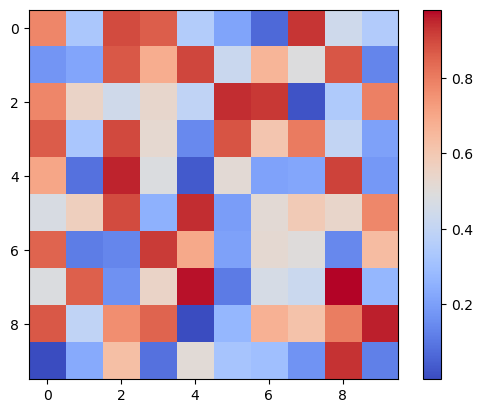

In [542]:
# Replace test_array with your results
test_array = np.random.random((10, 10))

plt.imshow(test_array, cmap = 'coolwarm')
plt.colorbar()
plt.show()

### 3) Vertical advection
This gets a little more spicy than you might expect. Remember from above, we still have that pesky little $w\frac{dT}{dz}$ hanging out in our PDE. By now, we do know how to calculate $\frac{dT}{dz}$. In fact, maybe we should make that little calculation it's own method? It's a good time to check if you have any repeated code :) 

If we're truly in the middle of an ice sheet, we might assume the vertical velocity ($w$ in our equations here) scales with depth and the mass balance at the ice surface:

# $w(z) = -\frac{b(H - z)}{H}$,

where $b$ is the mass balance (accumulation - ablation) and $H$ is the ice thickness. Let's use a baseline value for $b$ of around a centimeter per year, but you should play with this number and see how it impacts your temperature profiles.

The trick here is that the size of our time steps might be too large when we add advection. One way to check is to use a CFL condition: a metric of stability. For diffusive equations, like this one, we should be okay if we're in the range:

# $\frac{\kappa\Delta t}{\Delta z}\leq 0.5$,

but there might be some complications as the advective component of the system grows. You know what would be sweet? What if we wrote a method that calculates the stable time step - we could even let the user know if they accidentally try to run the model with a time step that's too large!

### 4) Inheritance
Imagine you want to make this class more general - after all, it's just a 1D diffusion model! We could take the universal pieces out of this class and make a new class:

In [373]:
class DiffusionModel1D:

    def __init__(self):
        pass

    def run_one_step(self):
        pass

Then, the SimpleGlacier class could **inherit** from this *parent* class, becoming a *child* class of DiffusionModel1D.
##### Child classes inherit all the methods and attributes of their parents, except where specified.

In [548]:
# Example of a child class
class DiffusionChild(DiffusionModel1D):

    def __init__(self):
        pass

    def no_parents_allowed(self):
        pass

In [547]:
help(DiffusionChild.run_one_step)

Help on function run_one_step in module __main__:

run_one_step(self)



But, parent classes do not get any of the information defined by their children:

In [549]:
help(DiffusionModel1D.no_parents_allowed)

AttributeError: type object 'DiffusionModel1D' has no attribute 'no_parents_allowed'

Let's play around with this idea. First, split SimpleGlacier into a parent class and a child class. Then, try to make a new diffusion model that inherits from the same parent class, but adds a new method for plotting data.